In [1]:
# imports
from sklearn.cluster import KMeans
import pandas as pd
import plotly.express as px
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Constants
data_path = './data/'
graph_path = './graphs/'

In [3]:
# Reading the excel sheet
df = pd.read_excel(data_path+"TraningData.xlsx",engine="openpyxl")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Sparkline Group extension is not supported and will be removed
  warn(msg)


In [4]:
# Storing column names for bus 5 & 8 [P,Q]
cols = df.columns[4:8]

In [5]:
# coping data for Bus 5 & 8
data5 = df[cols[0:2]].copy()
data8 = df[cols[2:]].copy()

In [6]:
# generating KMeans for both Bus
km5 = KMeans(n_clusters=2, random_state=0).fit_predict(data5)
km8 = KMeans(n_clusters=2, random_state=0).fit_predict(data8)

In [7]:
# appending columns with generated labels
data5['labels'] = pd.Series(km5)
data8['labels'] = pd.Series(km8)

In [8]:
# graph for bus 5 with cluster
fig = px.parallel_coordinates(data5, color=str(data5.columns[-1]),color_continuous_scale=px.colors.diverging.Tealrose,color_continuous_midpoint=2)
fig.show()

In [9]:
# Value counts of 1 and 0
data5['labels'].value_counts()

0    8702
1     307
Name: labels, dtype: int64

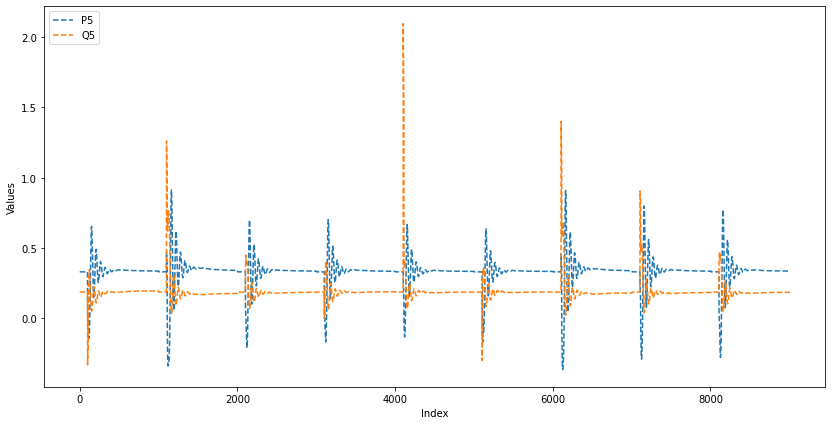

In [10]:
# plotting original data for bus 5
plt.figure(figsize=(14,7))
plt.xlabel("Index")
plt.ylabel("Values")
plt.plot(data5['P5'],'--',label='P5')
plt.plot(data5['Q5'],'--',label='Q5')
plt.legend(loc="upper left")
plt.savefig(graph_path+"normal_5")
plt.show()

In [44]:
data5.iloc[0]

P5        0.330154
Q5        0.186252
labels    0.000000
Name: 0, dtype: float64

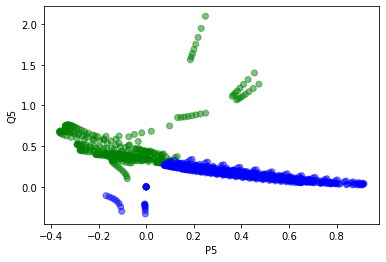

In [59]:
colors = []
for x in list(data5.index):
    
    if data5.iloc[x][-1] == 0:
        colors.append("blue")
    else:
        colors.append("green")
    
plt.scatter(data5['P5'],data5['Q5'],c=colors,alpha=0.5)
plt.xlabel("P5")
plt.ylabel("Q5")
plt.plot()
plt.show()

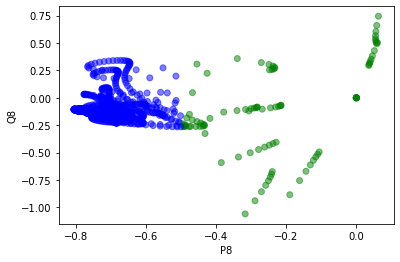

In [60]:
colors = []
for x in list(data8.index):
    
    if data8.iloc[x][-1] == 0:
        colors.append("blue")
    else:
        colors.append("green")
    
plt.scatter(data8['P8'],data8['Q8'],c=colors,alpha=0.5)
plt.xlabel("P8")
plt.ylabel("Q8")
plt.plot()
plt.show()

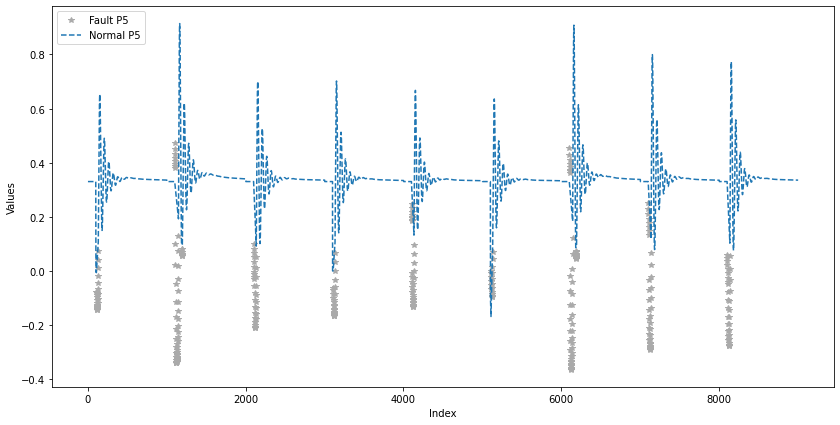

In [11]:
# plotting the original data with labels for Bus 5
temp1 = data5[data5['labels']==1]
temp0 = data5[data5['labels']==0]

plt.figure(figsize=(14,7))
plt.xlabel("Index")
plt.ylabel("Values")
plt.plot(temp1['P5'],'*',color='#AAAAAA',label='Fault P5')
plt.plot(temp0['P5'],'--',label='Normal P5')
plt.legend(loc="upper left")
plt.savefig(graph_path+"compare_P5")
plt.show()

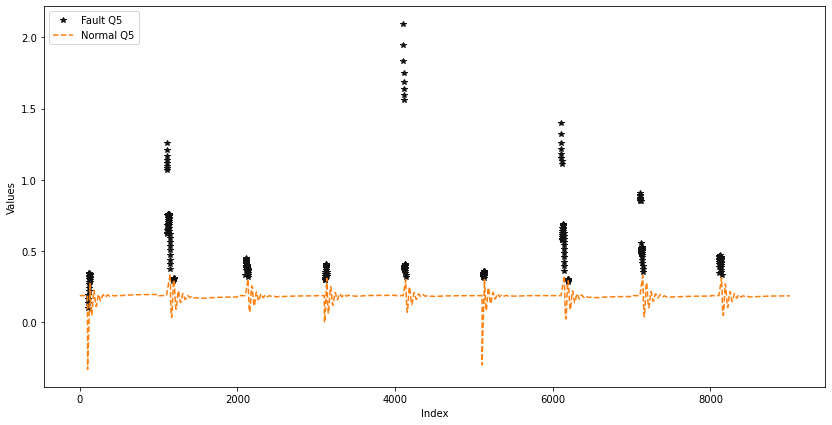

In [12]:
# plotting the original data with labels for Bus 5
temp1 = data5[data5['labels']==1]
temp0 = data5[data5['labels']==0]

plt.figure(figsize=(14,7))
plt.xlabel("Index")
plt.ylabel("Values")
plt.plot(temp1['Q5'],'*',color='#121212',label='Fault Q5')
plt.plot(temp0['Q5'],'--',color="C1",label='Normal Q5')
plt.legend(loc="upper left")
plt.savefig(graph_path+"compare_Q5")
plt.show()

In [13]:
# grapg for bus 8 with cluster
fig = px.parallel_coordinates(data8, color=str(data8.columns[-1]),color_continuous_scale=px.colors.diverging.Tealrose,color_continuous_midpoint=2)
fig.show()

In [14]:
# Value counts of 1 and 0
data8['labels'].value_counts()

0    8912
1      97
Name: labels, dtype: int64

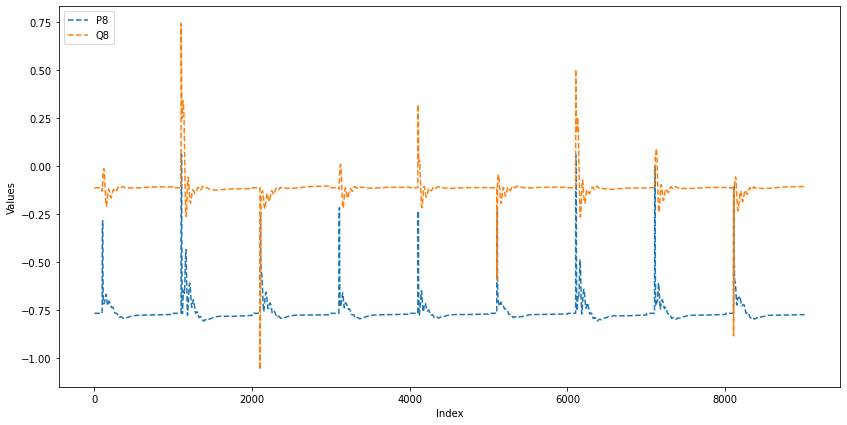

<Figure size 432x288 with 0 Axes>

In [15]:
# plotting original data for bus 8
plt.figure(figsize=(14,7))
plt.xlabel("Index")
plt.ylabel("Values")
plt.plot(data8['P8'],'--',label='P8')
plt.plot(data8['Q8'],'--',label='Q8')
plt.legend(loc="upper left")
plt.show()
plt.savefig(graph_path+"normal_8")

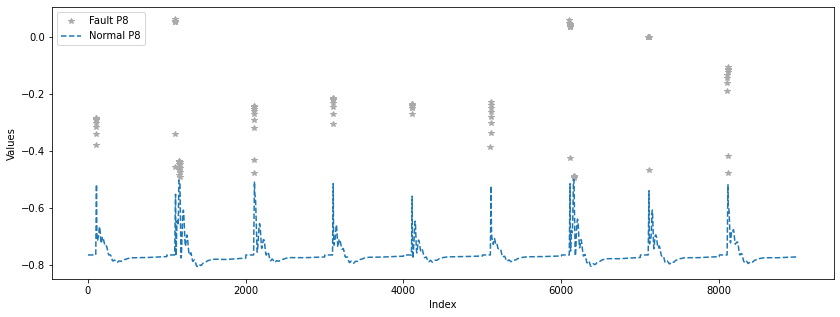

<Figure size 432x288 with 0 Axes>

In [16]:
# plotting the original data with labels for Bus 5
temp1 = data8[data8['labels']==1]
temp0 = data8[data8['labels']==0]

plt.figure(figsize=(14,5))
plt.xlabel("Index")
plt.ylabel("Values")
plt.plot(temp1['P8'],'*',color='#AAAAAA',label='Fault P8')
plt.plot(temp0['P8'],'--',label='Normal P8')
plt.legend(loc="upper left")
plt.show()
plt.savefig(graph_path+"compare_P8")

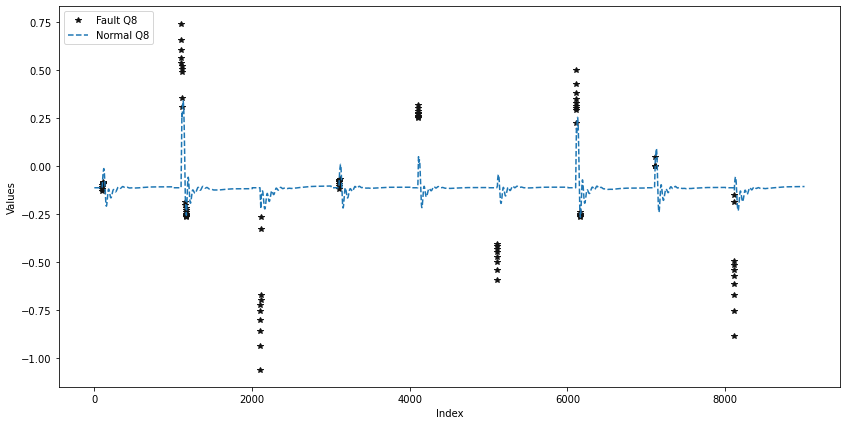

<Figure size 432x288 with 0 Axes>

In [17]:
# plotting the original data with labels for Bus 5
temp1 = data8[data8['labels']==1]
temp0 = data8[data8['labels']==0]

plt.figure(figsize=(14,7))
plt.xlabel("Index")
plt.ylabel("Values")
plt.plot(temp1['Q8'],'*',color='#121212',label='Fault Q8')
plt.plot(temp0['Q8'],'--',label='Normal Q8')
plt.legend(loc="upper left")
plt.show()
plt.savefig(graph_path+"compare_Q8")

### Gaussian distribution can help to get the normal values for the data and we can identify the outliers.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



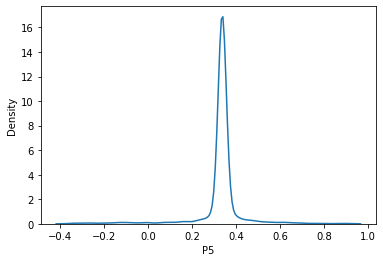

In [18]:
sns.distplot(data5['P5'], hist=False)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



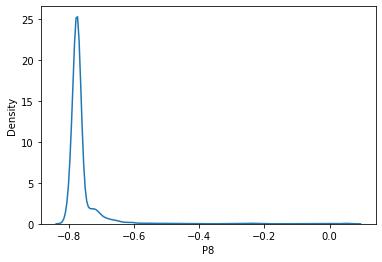

In [19]:
sns.distplot(data8['P8'], hist=False)
plt.show()